In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import originpro as op
import sys

In [ ]:
# Import Peak Area .txt files
path = r"C:\Users\flahertylab\OneDrive - Georgia Institute of Technology\Flaherty Research Group - ESS\01 - Raman Data\ESS-1-165_O2_cutoff_redux\6ppmCl\40kPa O2\Peak Area refined BS12"
base_path = os.path.dirname(path)
file_name = "ESS-1-165_06ppmCl_40kPaO2_cutoff_1-3_peak_area_refined_BS12"

save_path = os.path.join(base_path, f"{file_name}.opju")



dirlist = os.listdir(path)

for index,file in enumerate(dirlist):
    file_path = path + '\\' + file
    curve_center, extension = os.path.splitext(file)
    curve_center = int(curve_center) # Now can reference header as integer instead of string

    if not index:
        df = pd.read_csv(file_path, sep='\t', names=['Time (s)', curve_center])
        df = df.iloc[1:]
        pass
    else:
        df2 = pd.read_csv(file_path, sep='\t', names=['Time (s)', curve_center])
        df2 = df2.iloc[1:]
        df[curve_center] = df2[curve_center]

df = df.apply(pd.to_numeric, errors='coerce')
df = df.set_index('Time (s)')

df

,1050,110,120,1350,1600,1800,220,350,600,680,720,800,990
Time (s),,,,,,,,,,,,,
0.000000,475578.375000,335236.75000,1482128.875,7.025398e+05,5206388.5,0.000000,1599115.875,0.000000,0.000000,435304.468750,113169.460938,0.000000,415465.968750
37.914848,213478.125000,393911.09375,1518605.125,1.136787e+06,5042814.0,22.884331,1925362.500,11756.848633,31086.230469,311619.812500,124593.640625,387.094666,400275.312500
75.840578,221764.609375,388918.71875,1502201.625,1.205672e+06,5147703.0,0.000000,1800070.250,23443.412109,148645.390625,144601.609375,162554.390625,0.000000,378095.718750
113.739501,245850.593750,404267.71875,1535873.250,1.145585e+06,5331051.0,189480.375000,1742445.875,51433.933594,0.000000,339361.718750,60248.710938,0.000000,404449.875000
151.657263,197139.500000,390278.50000,1552156.500,1.518963e+06,6092274.5,0.000000,1942643.625,55551.902344,0.000000,509749.218750,59726.703125,0.000000,515243.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122685.920607,159020.390625,375470.21875,1570306.750,1.889360e+06,5856566.5,300261.375000,1952576.500,51829.394531,9730.546875,552574.687500,46131.519531,0.000000,338010.875000
122723.828265,55316.300781,302159.15625,1635979.125,9.730058e+03,5624872.0,2220.158447,1887650.375,0.000000,438.754974,254107.000000,18251.867188,0.000000,245935.406250
122761.747891,88220.312500,311755.43750,1566213.250,1.920800e+04,5612339.5,559.940002,1736710.625,0.000000,0.000000,136212.937500,22644.525391,0.000000,238890.953125


In [3]:
with open('../bins.json', 'r') as f:
    column_bins = json.load(f)

binned_dfs = {}
columns = list(df.columns)
df_copy = df.copy()


for bin_name, (low, high) in column_bins.items():
    selected_cols = [col for col in columns if low <= col <= high]
    if selected_cols:
        #selected_cols.insert(0, 'Time (s)')
        binned_dfs[bin_name] = df_copy[selected_cols]



keys = list(binned_dfs.keys())
index = 3
print(keys[index])
binned_dfs[keys[index]]

Peroxo


,680,720,800
Time (s),,,
0.000000,435304.468750,113169.460938,0.000000
37.914848,311619.812500,124593.640625,387.094666
75.840578,144601.609375,162554.390625,0.000000
113.739501,339361.718750,60248.710938,0.000000
151.657263,509749.218750,59726.703125,0.000000
...,...,...,...
122685.920607,552574.687500,46131.519531,0.000000
122723.828265,254107.000000,18251.867188,0.000000
122761.747891,136212.937500,22644.525391,0.000000


In [4]:
# Check that this code grabbed all the columns

original_cols = set(df.columns)
binned_cols = set()
for subdf in binned_dfs.values():
    binned_cols.update(subdf.columns)

if original_cols == binned_cols:
    print("✅ All columns are correctly binned!")
else:
    print("❌ Column mismatch detected.")

    missing = original_cols - binned_cols
    extra = binned_cols - original_cols

    if missing:
        print("Columns missing from bins:", missing)
    if extra:
        print("Columns in bins that are not in original df:", extra)

❌ Column mismatch detected.
Columns missing from bins: {1050}


In [5]:
for name, subdf in binned_dfs.items():
    subdf = subdf.copy()
    subdf.loc[:,'Total'] = subdf.sum(axis=1)
    binned_dfs[name] = subdf

keys = list(binned_dfs.keys())
index = 3
print(keys[index])
binned_dfs[keys[index]]

Peroxo


,680,720,800,Total
Time (s),,,,
0.000000,435304.468750,113169.460938,0.000000,548473.929688
37.914848,311619.812500,124593.640625,387.094666,436600.547791
75.840578,144601.609375,162554.390625,0.000000,307156.000000
113.739501,339361.718750,60248.710938,0.000000,399610.429688
151.657263,509749.218750,59726.703125,0.000000,569475.921875
...,...,...,...,...
122685.920607,552574.687500,46131.519531,0.000000,598706.207031
122723.828265,254107.000000,18251.867188,0.000000,272358.867188
122761.747891,136212.937500,22644.525391,0.000000,158857.462891


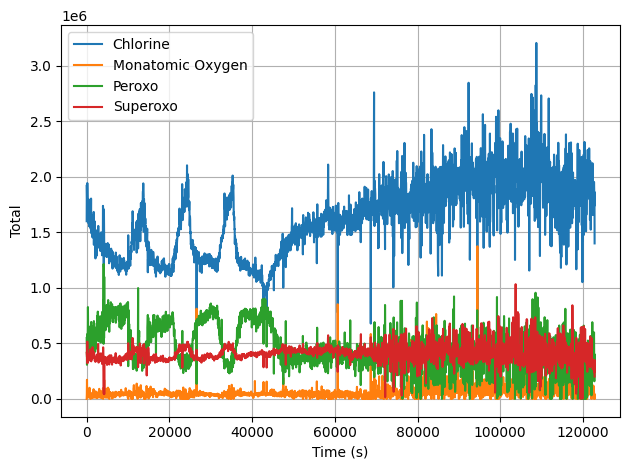

In [6]:
excluded_bins = { 'C2+', 'Normalization'}

# Filter binned_dfs
filtered_binned_dfs = {
    name: df_copy for name, df_copy in binned_dfs.items()
    if name not in excluded_bins
}

for name, subdf in filtered_binned_dfs.items():
    
    plt.plot(subdf.index, subdf['Total'], label=name)

plt.xlabel('Time (s)')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
n = 10     # Number of points to average
df_copy = df.copy()
for name, df_copy in filtered_binned_dfs.items():
    #df_copy = df_copy.copy()
    # Create a group ID based on position
    group_ids = [i // n for i in range(len(df_copy))]

    # Convert index to numeric values (in case it's not)
    time_numeric = df_copy.index.to_series().astype(float)

    # Combine data and time index into one DataFrame
    df_copy['_Time'] = time_numeric.values
    grouped = df_copy.groupby(group_ids)

    # Average data + time
    df_avg = grouped.mean()

    # Use averaged time as the new index
    df_avg.index = df_avg['_Time']
    df_avg = df_avg.drop(columns='_Time')

    # Save back
    filtered_binned_dfs[name] = df_avg

filtered_binned_dfs["Peroxo"]

,680,720,800,Total
_Time,,,,
170.611977,435560.642188,109023.032813,984.910346,545568.585346
549.739656,407869.390625,89758.947657,17825.432233,515453.770514
928.868825,425818.121875,81145.793360,5279.167017,512243.082251
1307.997237,417743.262500,76202.227735,3941.417163,497886.907398
1687.123346,482863.293750,90107.838672,12100.144629,585071.277051
...,...,...,...,...
121491.663539,170782.732031,92066.663086,13827.332813,276676.727930
121870.791672,249908.834375,67760.232031,6939.017480,324608.083887
122249.920218,365120.385156,71330.168360,6753.473563,443204.027079


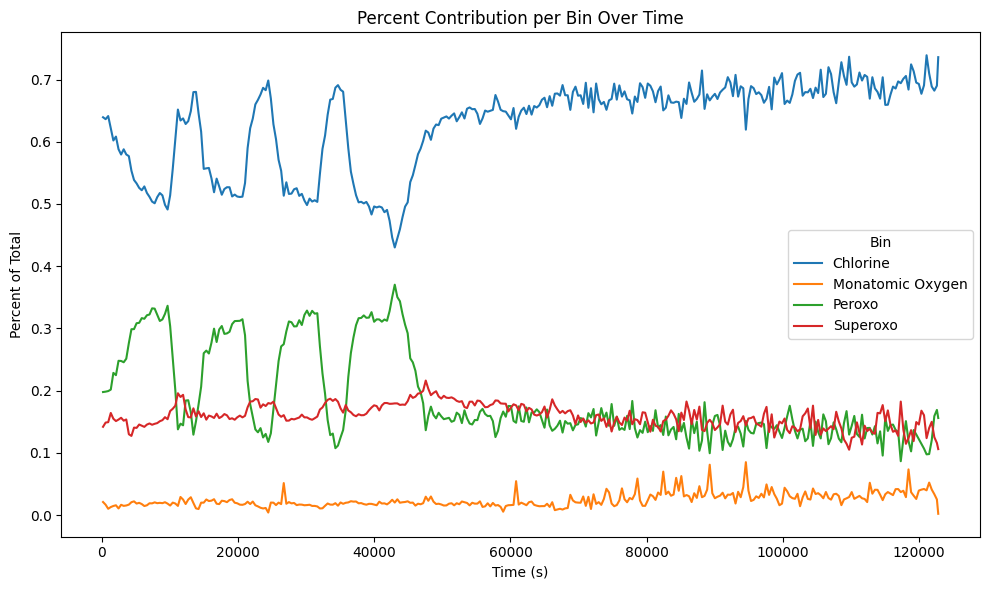

,Chlorine,Monatomic Oxygen,Peroxo,Superoxo
_Time,,,,
170.611977,1.764111e+06,57893.433399,545568.585346,391438.462500
549.739656,1.653490e+06,43266.023926,515453.770514,386332.059375
928.868825,1.648495e+06,25956.161719,512243.082251,383797.921875
1307.997237,1.534521e+06,31778.746778,497886.907398,405196.784375
1687.123346,1.541416e+06,37401.504175,585071.277051,396331.875000


In [8]:
# Step 1: Combine "Total" columns across bins
totals_df = pd.DataFrame({
    name: df_copy['Total']
    for name, df_copy in filtered_binned_dfs.items()
})

# Step 2: Normalize each row to sum to 100%
percent_df = totals_df.div(totals_df.sum(axis=1), axis=0)

percent_df.plot(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Percent of Total')
plt.title('Percent Contribution per Bin Over Time')
plt.legend(title='Bin')
plt.tight_layout()
plt.show()
totals_df.head()

In [9]:
totals_df.to_clipboard()
totals_df.head()

,Chlorine,Monatomic Oxygen,Peroxo,Superoxo
_Time,,,,
170.611977,1.764111e+06,57893.433399,545568.585346,391438.462500
549.739656,1.653490e+06,43266.023926,515453.770514,386332.059375
928.868825,1.648495e+06,25956.161719,512243.082251,383797.921875
1307.997237,1.534521e+06,31778.746778,497886.907398,405196.784375
1687.123346,1.541416e+06,37401.504175,585071.277051,396331.875000


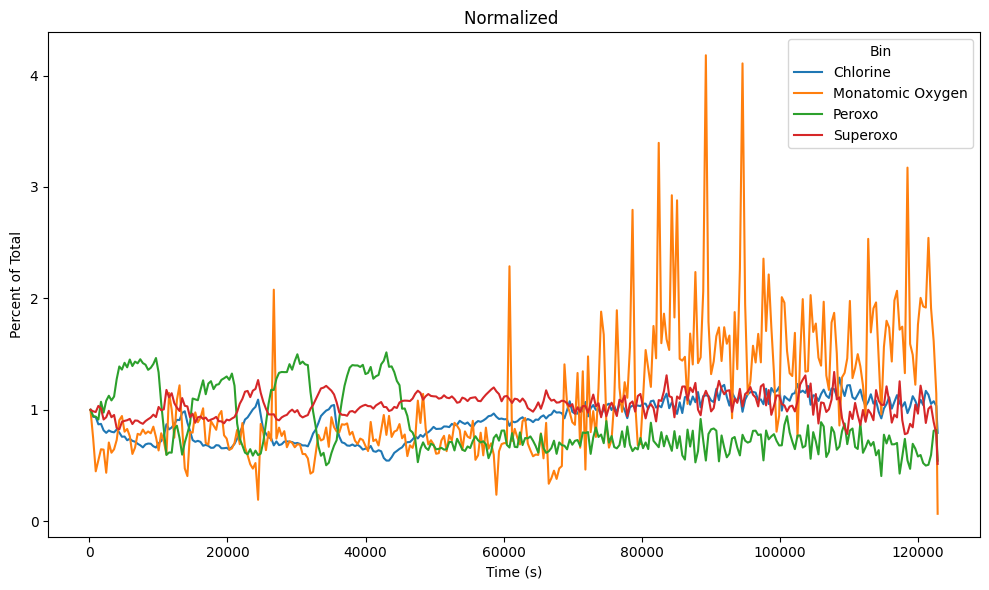

,Chlorine,Monatomic Oxygen,Peroxo,Superoxo
_Time,,,,
170.611977,1.000000,1.000000,1.000000,1.000000
549.739656,0.937294,0.747339,0.944801,0.986955
928.868825,0.934462,0.448344,0.938916,0.980481
1307.997237,0.869855,0.548918,0.912602,1.035148
1687.123346,0.873764,0.646041,1.072406,1.012501


In [10]:
# Step 1: Combine "Total" columns across bins
individual_df = pd.DataFrame({
    name: df_copy['Total']
    for name, df_copy in filtered_binned_dfs.items()
})

# Step 2: Normalize each row to sum to 100%
ind_norm_df = individual_df.div(individual_df.iloc[0], axis=1)

ind_norm_df.plot(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Percent of Total')
plt.title('Normalized ')
plt.legend(title='Bin')
plt.tight_layout()
plt.show()
ind_norm_df.head()

In [11]:
ind_norm_df.to_clipboard()
ind_norm_df.head()

,Chlorine,Monatomic Oxygen,Peroxo,Superoxo
_Time,,,,
170.611977,1.000000,1.000000,1.000000,1.000000
549.739656,0.937294,0.747339,0.944801,0.986955
928.868825,0.934462,0.448344,0.938916,0.980481
1307.997237,0.869855,0.548918,0.912602,1.035148
1687.123346,0.873764,0.646041,1.072406,1.012501


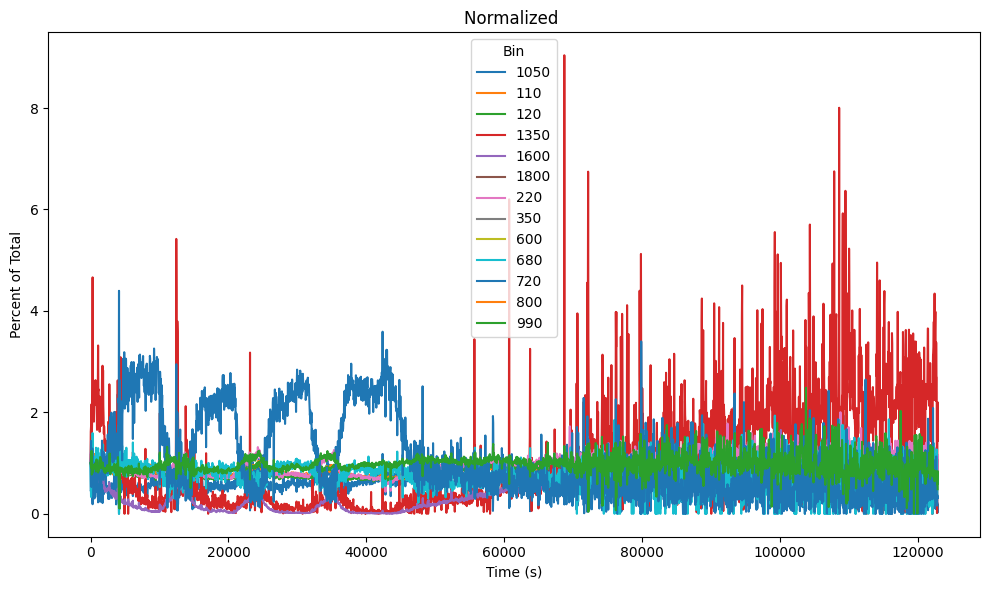

,1050,110,120,1350,1600,1800,220,350,600,680,720,800,990
Time (s),,,,,,,,,,,,,
0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000
37.914848,0.448881,1.175024,1.024611,1.618110,0.968582,inf,1.204017,inf,inf,0.715866,1.100948,inf,0.963437
75.840578,0.466305,1.160132,1.013543,1.716163,0.988728,NaN,1.125666,inf,inf,0.332185,1.436380,NaN,0.910052
113.739501,0.516951,1.205917,1.036262,1.630634,1.023944,inf,1.089631,inf,NaN,0.779596,0.532376,NaN,0.973485
151.657263,0.414526,1.164188,1.047248,2.162103,1.170154,NaN,1.214824,inf,NaN,1.171018,0.527763,NaN,1.240158


In [12]:
# Step 1: Combine "Total" columns across bins
individual_raw_df = df.copy()

# Step 2: Normalize each row to sum to 100%
ind_raw_norm_df = individual_raw_df.div(individual_raw_df.iloc[0], axis=1)

ind_raw_norm_df.plot(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Percent of Total')
plt.title('Normalized ')
plt.legend(title='Bin')
plt.tight_layout()
plt.show()
ind_raw_norm_df.head()

In [13]:
# ind_raw_norm_df.to_clipboard()

In [14]:
def origin_shutdown_exception_hook(extype, value, traceback):
    '''Ensures Origin gets shut down if there is an uncaught exception'''
    op.exit()
    sys.__excepthook__(extype, value, traceback)
if op and op.oext:
    sys.excepthook = origin_shutdown_exception_hook

if op.oext:
    op.set_show(True)

# Code here
all_wks = op.new_sheet('w','all')
all_wks.get_book().add_sheet().from_df(df, addindex=True)

gr = op.new_graph(template='scatter')
gl_1 = gr[0]
p1 = gl_1.add_plot('[all]Sheet2!(A,B:N)', type='s')
gl_1.group(True, 0, 2)
#p1.color = '#335eff'
gl_1.rescale()


dest_wks = op.new_sheet('w','percent')
dest_wks.get_book().add_sheet().from_df(percent_df, addindex=True)

totals_wks = op.new_sheet('w','totals')
totals_wks.get_book().add_sheet().from_df(totals_df, addindex=True)



gr = op.new_graph(template='scatter')
gl_1 = gr[0]
p1 = gl_1.add_plot('[percent]Sheet2!(A,B:E)', type='s')
gl_1.group(True, 0, 2)
#p1.color = '#335eff'
gl_1.rescale()


op.save(save_path)

op.oext = True
if op.oext:
    op.exit()

In [15]:
needs_averaging = 123
if needs_averaging:
    print('Data Averaged')
else:
    print('Data not averaged') 

Data Averaged
